In [3]:
import numpy as np
from scipy import stats
import math
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import sys
from haversine import haversine
import pandas as pd
import geopandas as gpd

In [7]:
#read in the data
q1 = gpd.read_file('data/processed-labels/q1_clusters.shp')
q2 = gpd.read_file('data/processed-labels/q2_clusters.shp')
q3 = gpd.read_file('data/processed-labels/q3_clusters.shp')
q4 = gpd.read_file('data/processed-labels/q4_clusters.shp')

<AxesSubplot: >

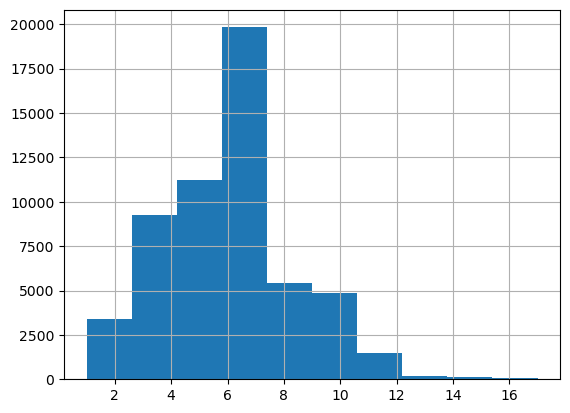

In [11]:
#count the number of same cluser_ids and store in a column
q1['count'] = q1.groupby('cluster_id')['cluster_id'].transform('count')

#count in histogram
q1['count'].hist()

In [12]:
q2['count'] = q2.groupby('cluster_id')['cluster_id'].transform('count')
q3['count'] = q3.groupby('cluster_id')['cluster_id'].transform('count')
q4['count'] = q4.groupby('cluster_id')['cluster_id'].transform('count')

In [19]:
q2['clustered'].value_counts()

0    18018
1    12288
Name: clustered, dtype: int64

In [20]:
q1['clustered'].value_counts()

0    30908
1    24893
Name: clustered, dtype: int64

In [21]:
q3['clustered'].value_counts()

0    33512
1    26869
Name: clustered, dtype: int64

In [22]:
q4['clustered'].value_counts()

0    29456
1    21839
Name: clustered, dtype: int64

In [13]:
#select only label_id label_type, clustered and geometry
q1 = q1[['label_id', 'clustered', 'count']]
q2 = q2[['label_id', 'clustered','count']]
q3 = q3[['label_id', 'clustered','count']]
q4 = q4[['label_id', 'clustered','count']]

In [14]:
# concatenate the dataframes q1 q2 q3 q4
df = pd.concat([q1, q2, q3, q4], ignore_index=True)

In [15]:
df['label_id'].nunique()

195501

In [16]:
# if label_id appears more than once keep clustered = 1
df = df.groupby('label_id').max()

In [17]:
#reset index
df = df.reset_index()

In [18]:
df

,label_id,clustered,count
0,9,1,6
1,10,1,6
2,11,0,10
3,12,0,3
4,13,0,9
...,...,...,...
195496,233233,0,6
195497,233234,0,7
195498,233235,0,8
195499,233236,1,7


In [20]:
labels = gpd.read_file('data/processed-labels/seattle.shp')

In [10]:
#find label ids that are in labels but not in df
a = labels[~labels['label_id'].isin(df['label_id'])]

In [23]:
#merge df with labels how inner
df1 = pd.merge(df, labels, on='label_id', how='outer')
#select only label_id and clustered
df1 = df1[['label_id', 'clustered','count']]
#fill na with 0 
df1 = df1.fillna(0)

In [24]:
df1

,label_id,clustered,count
0,9,1.0,6.0
1,10,1.0,6.0
2,11,0.0,10.0
3,12,0.0,3.0
4,13,0.0,9.0
...,...,...,...
195538,116833,0.0,0.0
195539,37995,0.0,0.0
195540,37983,0.0,0.0
195541,37989,0.0,0.0


In [25]:
#export to csv
df1.to_csv('data/features/clustered.csv', index=False)